In [0]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier 
from sklearn.model_selection import KFold 
from tensorflow.keras.optimizers import Adam

tf.logging.set_verbosity(tf.logging.ERROR)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
data = np.load('/content/drive/My Drive/test_colab/dataset_1_char_45000_15000.npy')
data

array([[  0., 104., 116., ...,   0.,   0.,   0.],
       [  0., 104., 116., ...,   0.,   0.,   0.],
       [  0., 104., 116., ...,   0.,   0.,   0.],
       ...,
       [  1., 104., 116., ...,   0.,   0.,   0.],
       [  1., 104., 116., ..., 117., 115., 116.],
       [  1., 104., 116., ...,   0.,   0.,   0.]])

In [0]:
data.shape

(60000, 101)

In [0]:
x = np.delete(data, 0, axis=1)

In [0]:
x.shape

(60000, 100)

In [0]:
y = [row[0] for row in data]

In [0]:
y = np.asarray(y)
y.shape

(60000,)

In [0]:
X_train, X_test, Y_train0, Y_test0 = train_test_split(x, y, test_size=0.2, random_state=10)
X_train.shape, X_test.shape, Y_train0.shape, Y_test0.shape

((48000, 100), (12000, 100), (48000,), (12000,))

In [0]:
from tensorflow.keras.utils import to_categorical

  Y_train = to_categorical(Y_train0, 2)
Y_test = to_categorical(Y_test0, 2)
Y_train.shape

(48000, 2)

In [0]:
## MLP

model = Sequential()
model.add(Dense(20, activation='relu', input_dim=100))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [0]:
model.fit(X_train, Y_train, epochs=20, batch_size=512)
score = model.evaluate(X_test, Y_test, batch_size=512)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
48000/48000 [==============================] - 0s 8us/sample - loss: 14.8319 - categorical_accuracy: 0.6926
Epoch 2/20
48000/48000 [==============================] - 0s 6us/sample - loss: 1.1908 - categorical_accuracy: 0.7543
Epoch 3/20
48000/48000 [==============================] - 0s 6us/sample - loss: 0.6771 - categorical_accuracy: 0.7693
Epoch 4/20
48000/48000 [==============================] - 0s 5us/sample - loss: 0.6431 - categorical_accuracy: 0.7761
Epoch 5/20
48000/48000 [==============================] - 0s 6us/sample - loss: 0.5467 - categorical_accuracy: 0.7809
Epoch 6/20
48000/48000 [==============================] - 0s 6us/sample - loss: 0.6023 - categorical_accuracy: 0.7846
Epoch 7/20
48000/48000 [==============================] - 0s 6us/sample - loss: 0.4888 - categorical_accuracy: 0.7976
Epoch 8/20
48000/48000 [==============================] - 0s 5us/sample - loss: 0.4607 - categorical_accuracy: 0.8200
Epoch 9/20
48000/48000 [==============================]

In [0]:
y_pred_model = model.predict(X_test.astype("float"))
y_pred_model
y_pred = np.where(y_pred_model > 0.5, 1, 0)
y_pred
print(classification_report(Y_test, y_pred, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.87      0.98      0.92      8953
     class 1       0.90      0.56      0.69      3047

   micro avg       0.87      0.87      0.87     12000
   macro avg       0.88      0.77      0.81     12000
weighted avg       0.88      0.87      0.86     12000
 samples avg       0.87      0.87      0.87     12000



In [0]:
X_train

array([[104., 116., 116., ...,   0.,   0.,   0.],
       [104., 116., 116., ...,   0.,   0.,   0.],
       [104., 116., 116., ...,   0.,   0.,   0.],
       ...,
       [104., 116., 116., ...,   0.,   0.,   0.],
       [104., 116., 116., ...,   0.,   0.,   0.],
       [104., 116., 116., ...,   0.,   0.,   0.]])

In [0]:
def func1():
  model = Sequential()
  model.add(Dense(20, activation='relu', input_dim=100))
  model.add(Dropout(0.5))
  model.add(Dense(2, activation='softmax'))
  model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['categorical_accuracy'])
  
  return model

In [0]:
neural_network = KerasClassifier(build_fn=func1, epochs=10, batch_size=10, verbose=0)
neural_network
recall_mlp = cross_val_score(neural_network, X_train, Y_train0, cv=10, scoring='recall')


In [0]:
recall_mlp

array([0.60445912, 0.65604027, 0.69051724, 0.5727198 , 0.47607053,
       0.61607143, 0.57453936, 0.46      , 0.40063593, 0.58099174])

In [0]:
recall = pd.read_csv('/content/drive/My Drive/test_colab/model_recall_score.csv')

In [0]:
recall

,LogisticRegression,Multinomial Naive Bayes,Decision tree,Random Forest,Gradient Boosting,XGBooster,SVC
0,0.604385,0.748332,0.527169,0.865586,0.768351,0.657769,0.656816
1,0.608198,0.752145,0.536702,0.838894,0.761678,0.684461,0.586273
2,0.556721,0.755005,0.542421,0.846520,0.759771,0.678742,0.606292
3,0.610105,0.737846,0.503337,0.839847,0.771211,0.665396,0.692088
4,0.656816,0.749285,0.559581,0.867493,0.778837,0.697807,0.521449
5,0.625357,0.746425,0.534795,0.857960,0.785510,0.689228,0.641563
6,0.603432,0.743565,0.516683,0.860820,0.776930,0.681602,0.428027
7,0.606292,0.739752,0.486177,0.838894,0.750238,0.667302,0.432793
8,0.586273,0.765491,0.562440,0.852240,0.770257,0.662536,0.359390
9,0.629171,0.750238,0.528122,0.875119,0.781697,0.689228,0.563394


In [0]:
recall.drop('Unnamed: 0', axis=1, inplace=True)

In [0]:
recall_mlp = pd.DataFrame({'MLP' : recall_mlp})

In [0]:
df = pd.concat([recall, recall_mlp], axis=1)

In [0]:
df

,LogisticRegression,Multinomial Naive Bayes,Decision tree,Random Forest,Gradient Boosting,XGBooster,SVC,MLP
0,0.604385,0.748332,0.527169,0.865586,0.768351,0.657769,0.656816,0.604459
1,0.608198,0.752145,0.536702,0.838894,0.761678,0.684461,0.586273,0.656040
2,0.556721,0.755005,0.542421,0.846520,0.759771,0.678742,0.606292,0.690517
3,0.610105,0.737846,0.503337,0.839847,0.771211,0.665396,0.692088,0.572720
4,0.656816,0.749285,0.559581,0.867493,0.778837,0.697807,0.521449,0.476071
5,0.625357,0.746425,0.534795,0.857960,0.785510,0.689228,0.641563,0.616071
6,0.603432,0.743565,0.516683,0.860820,0.776930,0.681602,0.428027,0.574539
7,0.606292,0.739752,0.486177,0.838894,0.750238,0.667302,0.432793,0.460000
8,0.586273,0.765491,0.562440,0.852240,0.770257,0.662536,0.359390,0.400636
9,0.629171,0.750238,0.528122,0.875119,0.781697,0.689228,0.563394,0.580992


In [0]:
df.to_csv('/content/drive/My Drive/test_colab/model_recall_score.csv')

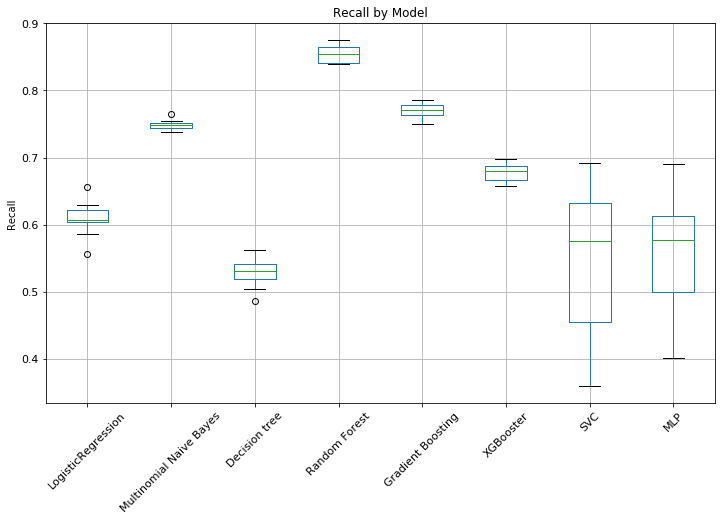

In [0]:
## boxplot
plt.figure(figsize=(12, 7))
df.boxplot(column= ['LogisticRegression', 'Multinomial Naive Bayes', 'Decision tree', 'Random Forest', 'Gradient Boosting', 'XGBooster', 'SVC', 'MLP']) 
plt.xticks(size = 11, rotation=45)
plt.yticks(size = 11)
plt.title('Recall by Model')
plt.ylabel("Recall")
plt.show()